<a href="https://colab.research.google.com/github/rlevy820/ds2002/blob/main/CSV_Pandas_HW_DS2002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv('https://raw.githubusercontent.com/fourfeatherz/DS2002F24/refs/heads/main/homework/acc_players-2324F.csv')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Totals,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Shooting,Unnamed: 15,Unnamed: 16,Unnamed: 17,Advanced,Unnamed: 19,Unnamed: 20
0,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2


In [68]:
# renaming headers
new_header = data.iloc[0]
data = data[1:]
data.columns = new_header
data.head()
# changing points to a numeric

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2
5,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9


In [82]:
data['PTS'] =  pd.to_numeric(data['PTS'])
data['MP'] = pd.to_numeric(data['MP'])
data['AST'] =  pd.to_numeric(data['AST'])

In [71]:
total_points = data['PTS'].sum()
total_points

38411

In [ ]:
most_minutes_players = data[['Player', 'MP']].sort_values(by='MP', ascending=False).head(1)
most_minutes_players

,Player,MP
179,Ian Schieffelin,989


In [ ]:
top_rebounders = data[['Player', 'TRB']].sort_values(by="TRB", ascending=False).head()
top_rebounders

,Player,TRB
125,Isaac McKneely,99
131,Kevin Miller,98
68,Darin Green Jr.,97
70,Jacob Groves,96
161,Tyrese Proctor,96


In [73]:
over_500_min_df = data[data["MP"] > 500]
over_500_min_df.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
5,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9
6,6,Armando Bacot,SR,F,North Carolina,37,1123,380,56,22,...,60,100,538,0.54,0.544,0.4,0.781,24.6,6.1,8.9
8,8,Reece Beekman,SR,G,Virginia,34,1114,124,212,68,...,70,43,486,0.443,0.487,0.31,0.754,23.4,4.9,10.5
10,10,Chris Bell,SO,F,Syracuse,32,865,75,21,18,...,26,58,384,0.434,0.459,0.42,0.842,14.9,2.2,3.3


In [53]:
highest_total_assists = over_500_min_df[['Player', 'AST']].sort_values(by='AST', ascending=False).head(1)
highest_total_assists

,Player,AST
202,Jalen Warley,92


In [54]:
top_3_assists = over_500_min_df[['Player', 'AST']].sort_values(by='AST', ascending=False).head(3)
top_3_assists

,Player,AST
202,Jalen Warley,92
204,Jamir Watkins,91
190,Kyle Sturdivant,91


In [56]:
top_3_shot_blockers = over_500_min_df[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(3)
top_3_shot_blockers

,Player,BLK
157,Wooga Poplar,9
116,Mason Madsen,8
96,Ty-Laur Johnson,8


In [74]:
total_pts_per_school = data.groupby('School')[['PTS']].sum()
total_pts_per_school

,PTS
School,
Boston College,2667
Clemson,2785
Duke,2830
Florida State,2526
Georgia Tech,2272
Louisville,2304
Miami (FL),2424
NC State,3101
North Carolina,3032


In [83]:
total_assists_per_school = data.groupby('School')[['AST']].sum()
total_assists_per_school

,AST
School,
Boston College,509
Clemson,533
Duke,551
Florida State,406
Georgia Tech,425
Louisville,356
Miami (FL),454
NC State,536
North Carolina,536


In [85]:
top_scoring_schools = total_pts_per_school.sort_values(by='PTS', ascending=False).head(3)
top_scoring_schools

,PTS
School,
NC State,3101
North Carolina,3032
Duke,2830


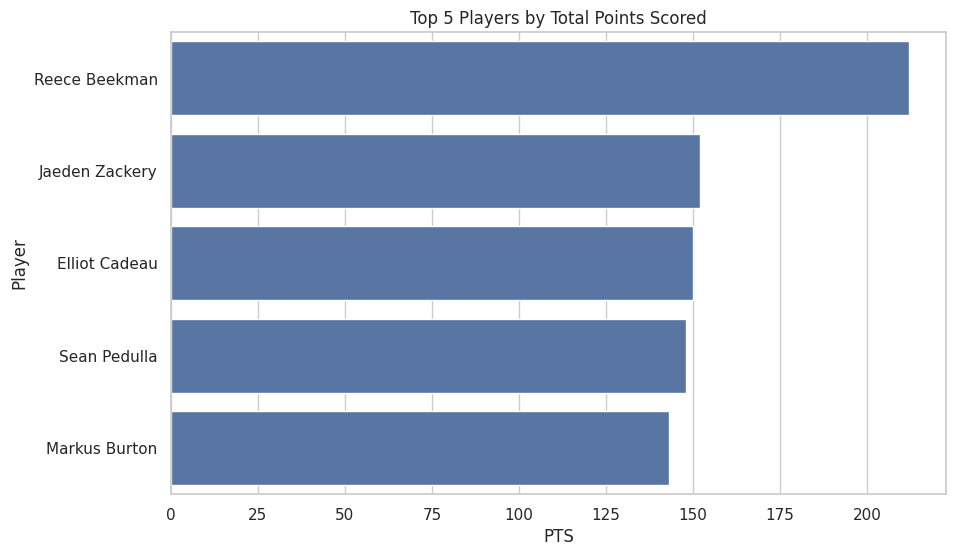

In [96]:
top_5_scorers = data.sort_values(by='PTS', ascending=False).head(5)

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='PTS', y='Player', data=top_5_scorers)
plt.title('Top 5 Players by Total Points Scored')
plt.show()

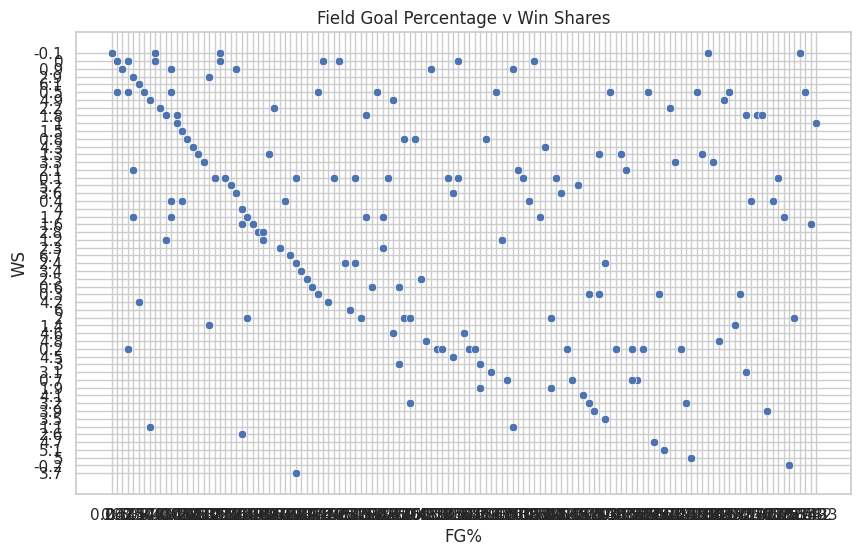

0.4210663894199787


In [95]:
correlation_df = data[['FG%', 'WS']]

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(x='FG%', y='WS', data=correlation_df)
plt.title('Field Goal Percentage v Win Shares')
plt.show()

correlation_coefficient = correlation_df['FG%'].corr(correlation_df['WS'])
print(correlation_coefficient)

### Reflection
1. I learned how to use key pandas functions like groupby and sort_values to organize data and the head function to display only a certain number of rows. I also practiced filtering and querying data using the pd library, which helped me better understand how to manipulate data efficiently. Additionally, I became more familiar with using Matplotlib and Seaborn to create visualizations that allow for better analysis of trends and patterns in the data.
2. One of the main challenges I faced was renaming the header to match the first row of the dataset. Initially, I struggled with how to do this, but after researching different approaches to updating headers, I was able to figure it out. This process helped me realize the creative and flexible ways you can clean and structure a DataFrame, which is an important part of data analysis.
3. The techniques I learned from analyzing ACC basketball stats can be applied to other real-world datasets by filtering data to focus on a specific idea, identifying response and explanatory variables, and then training a linear regression model for prediction. This kind of approach is valuable not only in sports but also in fields like business, healthcare, and finance, where understanding relationships between variables is key for making informed decisions.